# 偏差和方差
test_data 真实评判


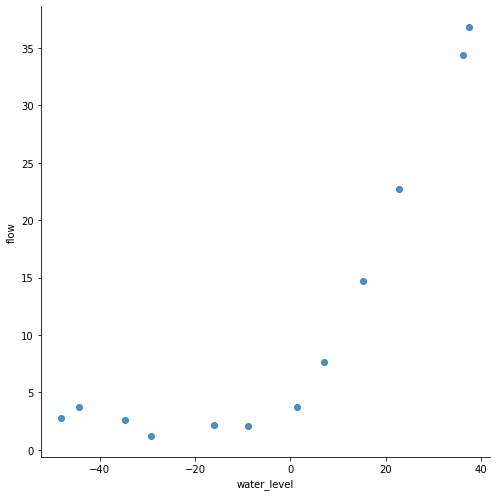

In [1]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(x):
    
    # 使用内建函数将所有的数据进行压缩成一个行向量并返回
    d = sio.loadmat(x)
    return map(np.ravel,[d['X'],d['y'],d['Xval'],d['yval'],d['Xtest'],d['ytest']])

X,y,Xval,yval,Xtest,ytest = load_data('ex5data1.mat')

df = pd.DataFrame({'water_level':X,'flow':y})

sns.lmplot(x = 'water_level', y = 'flow',data = df,fit_reg = False , height=7)
plt.show()   


In [2]:
# 对数据进行预处理，即加入偏置特征
# insert(arr, obj, values, axis=None) 
# 简记为：insert(原数组, 插入位置, 插入值, 默认按行插入（axis=1按列插入）)
X,Xval,Xtest = [np.insert(x.reshape(x.shape[0],1),0,np.ones(x.shape[0]),axis=1) for x in (X,Xval,Xtest)]
X.shape, Xval.shape, Xtest.shape

((12, 2), (21, 2), (21, 2))

# 代价函数
<img style="float: left;" src="img/linear_cost.png">

In [3]:
def cost(theta,X,y):
    
    #X乘以theta的转置，np.power( ,n)其中n表示n次方
    m = X.shape[0]
    cost = (1/(2*m) * np.sum(np.power(((X @ theta) - y) , 2)))
    
    return cost

theta = np.ones(X.shape[1])
cost(theta,X,y)

303.9515255535976

# 梯度
<img style="float: left;" src="img/linear_gradient.png">

In [4]:
def gradient(theta,X,y):
    m = X.shape[0]
    return (X.T @ (X @ theta - y))/m

gradient(theta,X,y)
    

array([-15.30301567, 598.16741084])

# 正则化梯度与代价函数
<img style="float: left;" src="img/linear_reg_gradient.png">

In [5]:
def regularized_gradient(theta, X, y, l=1):
    
    m = X.shape[0]
    regularized_term = theta.copy()
    regularized_term[0] = 0
    
    regularized_term = (l / m) * regularized_term
    
    return gradient(theta,X,y) + regularized_term   

In [6]:
regularized_gradient(theta, X, y)

array([-15.30301567, 598.25074417])

In [7]:
def regularized_cost(theta,X,y,l=1):
    
    m = X.shape[0]
    regularized_term = (l / (2 * m)) * np.power(theta[1:],2).sum()
    
    return cost(theta,X,y) + regularized_term

# 拟合数据
> 正则化项 $\lambda=0$

In [8]:
def linear_regression_np(X,y,l=1):
    
    theta = np.ones(X.shape[1])
    
    res = opt.minimize(fun = regularized_cost,
                      x0 = theta,
                      args = (X,y,l),
                      method = 'TNC',
                      jac = regularized_gradient,
                      options = {'disp':True})
    
    return res

theta = np.ones(X.shape[0])

final_theta = linear_regression_np(X,y,l=0).get("x")
final_theta

  NIT   NF   F                       GTG
    0    1  3.039515255535976E+02   3.58038434E+05
tnc: fscale = 0.000835613
    1    3  9.299577620594808E+01   1.36988337E+02
tnc: fscale = 0.0427197
    2    5  4.008670401834714E+01   2.25224917E+04
    3    7  2.237390649510906E+01   6.62767544E-11
tnc: fscale = 61417.1
tnc: |fn-fn-1] = 3.79097e-14 -> convergence
    4    9  2.237390649510902E+01   2.10473664E-13
tnc: Converged (|f_n-f_(n-1)| ~= 0)


array([13.08790398,  0.36777923])

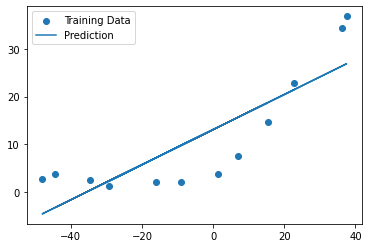

In [9]:
b = final_theta[0]
m = final_theta[1]

plt.scatter(X[:,1],y,label = "Training Data")
plt.plot(X[:,1],X[:,1]*m + b,label = "Prediction")
plt.legend(loc = 2)
plt.show()

In [10]:
training_cost,cv_cost = [],[]

1.使用训练集的子集来拟合应模型

2.在计算训练代价和交叉验证代价时，没有用正则化

3.记住使用相同的训练集子集来计算训练代价

TIP：向数组里添加新元素可使用append函数

  NIT   NF   F                       GTG
    0    1  1.457106922645887E+02   7.43067003E+04
tnc: fscale = 0.00183424
    1    3  8.631534185484672E-18   4.40174166E-15
tnc: |pg| = 3.61706e-05 -> local minimum
    1    3  8.631534185484672E-18   4.40174166E-15
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.878623740891748E+02   3.18073041E+05
tnc: fscale = 0.000886557
    1    3  2.004821342908418E-01   3.16698305E-02
tnc: fscale = 2.80962
    2    5  1.406351957438132E-04   1.55393840E-01
    3    7  8.371044654825317E-18   7.81622440E-18
tnc: |pg| = 9.95065e-10 -> local minimum
    3    7  8.371044654825317E-18   7.81622440E-18
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.932434806358119E+02   1.68157035E+05
tnc: fscale = 0.00121931
    1    3  8.863206576484284E+01   1.68991143E+02
tnc: fscale = 0.0384625
    2    5  4.163125460796083E+01   3.39442090E+04
    3    7  3.286595045501299E+00   2.32

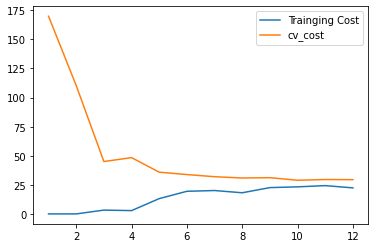

In [11]:
m = X.shape[0]

for i in range(1 , m+1):
    
    res = linear_regression_np(X[:i,:], y[:i], l=0)
    
    tc = regularized_cost(res.x,X[:i,:], y[:i], l=0)
    cv = regularized_cost(res.x,Xval, yval, l=0)
    
    training_cost.append(tc)
    cv_cost.append(cv)
    
plt.plot(np.arange(1, m+1),training_cost, label = 'Trainging Cost')
plt.plot(np.arange(1, m+1),cv_cost, label = 'cv_cost')
plt.legend(loc = 1)
plt.show()
    

# 创建多项式

In [12]:
def prepare_poly_data(*args , power):
    
    def prepare(x):
        
        df = poly_features(x,power = power)
        ndarr = normalize_feature(df).values
        
        return np.insert(ndarr,0,np.ones(ndarr.shape[0]),axis=1)
    
    return [prepare(x) for x in args]

def poly_features(x,power,as_ndarray=False):
    data = {'f{}'.format(i):np.power(x,i) for i in range(1,power +1)}
    df = pd.DataFrame(data)
    
    return df.vaules if as_ndarray else df

X,y,Xval,yval,Xtest,ytest = load_data('ex5data1')

poly_features(X,power=3)

,f1,f2,f3
0,-15.936758,253.980260,-4047.621971
1,-29.152979,849.896197,-24777.006175
2,36.189549,1309.683430,47396.852168
3,37.492187,1405.664111,52701.422173
4,-48.058829,2309.651088,-110999.127750
5,-8.941458,79.949670,-714.866612
6,15.307793,234.328523,3587.052500
7,-34.706266,1204.524887,-41804.560890
8,1.389154,1.929750,2.680720
9,-44.383760,1969.918139,-87432.373590


# 准备多项式回归数据

In [13]:
def normalize_feature(df):
    return df.apply(lambda column:(column - column.mean())/column.std())

X_poly,Xval_poly,Xtest_poly = prepare_poly_data(X,Xval,Xtest,power = 8)
X_poly[:3,:]

array([[ 1.00000000e+00, -3.62140776e-01, -7.55086688e-01,
         1.82225876e-01, -7.06189908e-01,  3.06617917e-01,
        -5.90877673e-01,  3.44515797e-01, -5.08481165e-01],
       [ 1.00000000e+00, -8.03204845e-01,  1.25825266e-03,
        -2.47936991e-01, -3.27023420e-01,  9.33963187e-02,
        -4.35817606e-01,  2.55416116e-01, -4.48912493e-01],
       [ 1.00000000e+00,  1.37746700e+00,  5.84826715e-01,
         1.24976856e+00,  2.45311974e-01,  9.78359696e-01,
        -1.21556976e-02,  7.56568484e-01, -1.70352114e-01]])

# 画学习曲线

  NIT   NF   F                       GTG
    0    1  4.051962082922054E+02   8.13788762E+04
tnc: fscale = 0.00175273
    1    4  5.832091076024397E-01   1.33251835E+00
tnc: fscale = 0.433145
    2    8  6.834158070274397E-18   1.13649621E-15
tnc: |pg| = 7.78306e-08 -> local minimum
    2    8  6.834158070274397E-18   1.13649621E-15
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.036860379928963E+02   2.05537014E+04
tnc: fscale = 0.00348759
    1    4  2.831008435195471E-01   3.56301816E-01
tnc: fscale = 0.837647
    2    8  1.147779356625167E-01   8.55453124E-09
tnc: fscale = 5405.95
tnc: |fn-fn-1] = 8.51076e-11 -> convergence
    3   11  1.147779355774091E-01   1.40281331E-18
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.697379646519273E+02   6.56611179E+03
tnc: fscale = 0.00617044
    1    4  1.433800288330111E+02   9.90612960E+02
    2    7  1.127877217867033E+02   3.29528542E-01
tnc: fscale = 0.

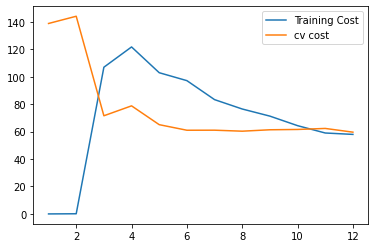

In [14]:
def plot_learning_curve(X,y,Xval,yval,l=0):
    
    training_cost,cv_cost = [],[]
    m = X.shape[0]
    for i in range(1,m+1):
        res = linear_regression_np(X[:i,:],y[:i],l=l)
        
        tc = cost(res.x,X[:i,:],y[:i])
        cv = cost(res.x,Xval,yval)
        
        training_cost.append(tc)
        cv_cost.append(cv)
        
    plt.plot(np.arange(1,m+1),training_cost,label='Training Cost')
    plt.plot(np.arange(1,m+1),cv_cost,label='cv cost')
    plt.legend(loc=1)
        

plot_learning_curve(X_poly,y,Xval_poly,yval,l=100)
plt.show()

#  找到最佳的lambda

In [15]:
# l_candidate = [0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10]
# training_cost,cv_cost = [],[]
l_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
training_cost, cv_cost = [], []

In [16]:
# for l in l_candidate:
#     res = linear_regression_np(X_poly,y,l)
    
#     tc = cost(res.x,X_poly,y)
#     cv = cost(res.x,Xval_poly,yval)
    
#     training_cost.append(tc)
#     cv_cost.append(cv)
    
for l in l_candidate:
    res = linear_regression_np(X_poly, y, l)
    
    tc = cost(res.x, X_poly, y)
    cv = cost(res.x, Xval_poly, yval)
    
    training_cost.append(tc)
    cv_cost.append(cv)

  NIT   NF   F                       GTG
    0    1  1.046321620777135E+02   3.09396153E+02
tnc: fscale = 0.0284258
    1    5  2.059429563982654E+00   5.93770564E-01
tnc: fscale = 0.648874
    2    9  9.713650915337676E-01   1.44363252E+00
    3   13  4.278498792421015E-01   2.51847215E-03
    4   18  2.422844046013120E-01   5.25402457E-05
tnc: fscale = 68.9801
    5   23  1.995427340518479E-01   1.38104221E-04
    6   28  1.932839463550511E-01   4.00911572E-03
    7   33  1.804348594143145E-01   4.20896034E-03
    8   36  1.778282399261131E-01   1.99747228E-04
    9   41  1.770073289328435E-01   1.19596160E-04
   10   46  1.751547181924394E-01   6.79177492E-04
   11   51  1.607910531176744E-01   1.75467436E-03
tnc: stepmx = 1000
   12   56  1.035467803015249E-01   1.44238115E-03
   13   61  9.871964341495983E-02   5.96763817E-04
   14   66  9.464493469392660E-02   4.42209075E-05
   15   71  9.198363249989411E-02   1.33364083E-03
   16   74  9.054279840976592E-02   1.28854817E-03
   1

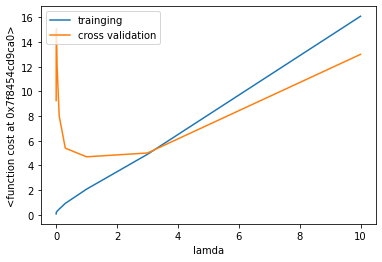

In [17]:
plt.plot(l_candidate,training_cost,label = 'trainging')
plt.plot(l_candidate,cv_cost,label = 'cross validation')
plt.legend(loc=2)
plt.xlabel('lamda')
plt.ylabel(cost)
plt.show()

In [18]:
l_candidate[np.argmin(cv_cost)]

1

In [23]:
test_cost = []
for i in l_candidate:
    theta = linear_regression_np(X_poly,y,i).x
    cost1 = cost(theta,Xtest_poly,ytest)
    print('test cost(l={})={}'.format(i,cost1))
    test_cost.append(cost1)
    
test_cost

test cost(l=0)=9.79939949868889
test cost(l=0.001)=11.054987989655938
test cost(l=0.003)=11.24919886153724
test cost(l=0.01)=10.879605199670008
test cost(l=0.03)=10.022734920552129
test cost(l=0.1)=8.632060998872074
test cost(l=0.3)=7.3366023840555314
test cost(l=1)=7.466303496640859
test cost(l=3)=11.643928200535113
test cost(l=10)=27.715080216719304


  NIT   NF   F                       GTG
    0    1  1.046321620777135E+02   3.09396153E+02
tnc: fscale = 0.0284258
    1    5  2.059429563982654E+00   5.93770564E-01
tnc: fscale = 0.648874
    2    9  9.713650915337676E-01   1.44363252E+00
    3   13  4.278498792421015E-01   2.51847215E-03
    4   18  2.422844046013120E-01   5.25402457E-05
tnc: fscale = 68.9801
    5   23  1.995427340518479E-01   1.38104221E-04
    6   28  1.932839463550511E-01   4.00911572E-03
    7   33  1.804348594143145E-01   4.20896034E-03
    8   36  1.778282399261131E-01   1.99747228E-04
    9   41  1.770073289328435E-01   1.19596160E-04
   10   46  1.751547181924394E-01   6.79177492E-04
   11   51  1.607910531176744E-01   1.75467436E-03
tnc: stepmx = 1000
   12   56  1.035467803015249E-01   1.44238115E-03
   13   61  9.871964341495983E-02   5.96763817E-04
   14   66  9.464493469392660E-02   4.42209075E-05
   15   71  9.198363249989411E-02   1.33364083E-03
   16   74  9.054279840976592E-02   1.28854817E-03
   1

[9.79939949868889,
 11.054987989655938,
 11.24919886153724,
 10.879605199670008,
 10.022734920552129,
 8.632060998872074,
 7.3366023840555314,
 7.466303496640859,
 11.643928200535113,
 27.715080216719304]

  5  3.337638612067248E+01   7.19721326E-03
tnc: fscale = 5.8937
    2    8  3.337220396391762E+01   3.71723589E-06
tnc: fscale = 259.334
    3   12  3.337220290489221E+01   2.28611696E-09
tnc: fscale = 10457.3
tnc: |fn-fn-1] = 1.23294e-09 -> convergence
    4   15  3.337220290365927E+01   1.54935002E-11
tnc: Converged (|f_n-f_(n-1)| ~= 0)
